In [1]:
import pandas as pd
pd.set_option('display.max_rows', 1000) #Just so we can see more rows
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("ggplot")

import sqlite3

# Just a markdown block, delete before submit, make active to see correctly #

All samples work in IT
 -> remote vs non remote
   -> mental illness %
     -> signifigance value > 0.05 (hist) (p-value)
   -> text - how many of them think that it has affected their career
     -> scatter plot if work environment is inclusive with mental health means that they are more comfortable/open about that
       -> if corr is positive then conclude that making more comf. env helps people with their mental issues
       
       
plots: #todo?
  does comfortability level affect mental health problems (if comf -> less & if not comf -> more)? -> comp with the other scapl
  

In [2]:
def create_connection(db_file): #found on https://www.sqlitetutorial.net/sqlite-python/sqlite-python-select/#:~:text=SQLite%20Python%3A%20Querying%20Data,-Summary%3A%20in%20this&text=To%20query%20data%20in%20an,Then%2C%20execute%20a%20SELECT%20statement.
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

In [3]:
#Creating different DataFrames from the sqlite file
con = create_connection('mental_health.sqlite')
q_df = pd.read_sql_query("SELECT * from Question", con)
a_df = pd.read_sql_query("SELECT * from Answer", con)
s_df = pd.read_sql_query("SELECT * from Survey", con)
con.close()

In [4]:
#Creating new scope user list that work for IT company
scope_user_list = a_df[(a_df.QuestionID == 9) & (a_df.AnswerText == "1")].UserID.tolist()
scope_df = a_df[a_df.UserID.isin(scope_user_list)]

#Narrowing the sample size down to only those who have answered if they work remotely
remote_answered_user_list = scope_df[scope_df.QuestionID == 118].UserID.tolist()
scope_df = scope_df[scope_df.UserID.isin(remote_answered_user_list)]

In [89]:
#Creating custom DataFrame with necessary fields and calculating some new values
custom_df = pd.DataFrame(columns=['UserID', 'Comfortability', 'Inclusivity', 'Remote_status', 'Has_mental_disorder'])

for i in range(len(remote_answered_user_list)):
    user_id = remote_answered_user_list[i]
    remote_status = scope_df[(scope_df.QuestionID == 118) & (scope_df.UserID == user_id)].AnswerText.max()
    has_mental_disorder = scope_df[(scope_df.QuestionID == 33) & (scope_df.UserID == user_id)].AnswerText.max()
    comf_level = 0
    incl_level = 0
    for j in [12, 18, 19, 29]:
        answer = scope_df[(scope_df.QuestionID == j) & (scope_df.UserID == user_id)].AnswerText.max()
        if answer == 'No':
            comf_level -= 1
        elif answer == 'Yes':
            comf_level += 1
    for k in [31, 90, 104]:
        answer = scope_df[(scope_df.QuestionID == k) & (scope_df.UserID == user_id)].AnswerText.max()
        if answer == 'No':
            comf_level += 1
        elif answer == 'Yes':
            comf_level -= 1
    for l in [10, 11, 14, 15, 16, 91, ]:
        answer = scope_df[(scope_df.QuestionID == l) & (scope_df.UserID == user_id)].AnswerText.max()
        if answer == 'No':
            incl_level -= 1
        elif answer == 'Yes':
            incl_level += 1
    for l2 in [17]:
        answer = scope_df[(scope_df.QuestionID == l2) & (scope_df.UserID == user_id)].AnswerText.max()
        if answer == 'Very difficult':
            incl_level -= 2
        elif answer == 'Somewhat difficult':
            incl_level -= 1
        elif answer == 'Somewhat easy':
            incl_level += 1
        elif answer == 'Very easy':
            incl_level += 2
    for m in [105]:
        answer = scope_df[(scope_df.QuestionID == m) & (scope_df.UserID == user_id)].AnswerText.max()
        if answer == 'No':
            incl_level += 1
        elif answer == 'Yes':
            incl_level -= 1
    for m2 in [114]:
        answer = scope_df[(scope_df.QuestionID == m2) & (scope_df.UserID == user_id)].AnswerText.max()
        if answer == 'Yes, they do':
            incl_level -= 2
        elif answer == 'Yes, I think they would':
            incl_level -= 1
        elif answer == "No, I don't think they would":
            incl_level += 1
        elif answer == 'No, they do not':
            incl_level += 2
    
    
    custom_df = custom_df.append({'UserID': user_id,
                                  'Comfortability': comf_level,
                                  'Inclusivity': incl_level,
                                  'Remote_status': remote_status,
                                  'Has_mental_disorder': has_mental_disorder},
                                 ignore_index = True)

<AxesSubplot:title={'center':'Do you currently have a mental health disorder?'}, xlabel='Has_mental_disorder'>

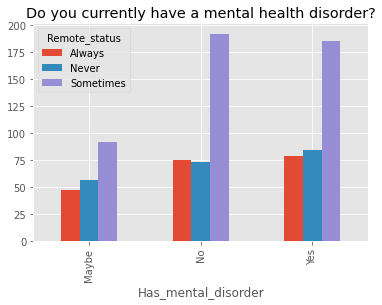

In [109]:
custom_df.groupby(['Has_mental_disorder', 'Remote_status']).Has_mental_disorder.count().unstack().plot(kind="bar", title="Do you currently have a mental health disorder?")

<AxesSubplot:title={'center':'Do you currently have mental disorder? (Always remote)'}, ylabel='Has_mental_disorder'>

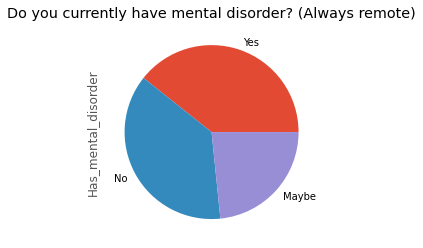

In [110]:
custom_df[custom_df.Remote_status == "Always"].Has_mental_disorder.value_counts().plot(kind="pie", title = "Do you currently have mental disorder? (Always remote)")

<AxesSubplot:title={'center':'Do you currently have mental disorder? (Sometimes remote)'}, ylabel='Has_mental_disorder'>

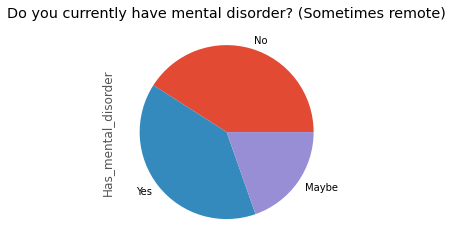

In [111]:
custom_df[custom_df.Remote_status == "Sometimes"].Has_mental_disorder.value_counts().plot(kind="pie", title = "Do you currently have mental disorder? (Sometimes remote)")

<AxesSubplot:title={'center':'Do you currently have mental disorder? (Never remote)'}, ylabel='Has_mental_disorder'>

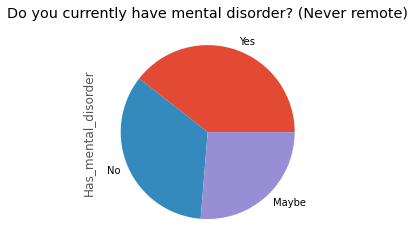

In [112]:
custom_df[custom_df.Remote_status == "Never"].Has_mental_disorder.value_counts().plot(kind="pie", title = "Do you currently have mental disorder? (Never remote)")

<AxesSubplot:xlabel='Inclusivity', ylabel='Comfortability'>

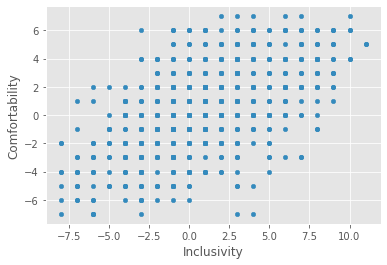

In [134]:
custom_df.plot(x="Inclusivity", y="Comfortability", kind="scatter")

In [133]:
custom_df[["Inclusivity", "Comfortability"]].astype(float).corr()

,Inclusivity,Comfortability
Inclusivity,1.000000,0.572055
Comfortability,0.572055,1.000000
